# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

# 1. Materials & Methods
This project concentrates on marketing long-term deposits to specific consumers using telemarketing calls. To advertise the deposit during a campaign, human agents engage in phone calls to a list of customers.

# a.methods
This research is based on actual data that was gathered from a Portuguese retail bank of 52944 phone conversations throughout the timeframe between May 2008 and June 2013. Since only 6557 records (12.38 %) are associated with successes, which the dataset is imbalanced.

For evaluation purposes, the records were primarily split into training (four years) and test data according to the passage of time (one year). The feature selection and models is performed using the training data, which contains of all contacts made up through June 2012 in a total of 51651 cases.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [268]:
import pandas as pd
########
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

from sklearn import datasets, svm, metrics
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingRandomSearchCV, HalvingGridSearchCV

import warnings 
warnings.filterwarnings('ignore')


In [205]:
#df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [206]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [207]:
#
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



# 3. solution
Features of the data

mostly all the categories of the data variables very determined with the given data type of each columns, no change of the data type,

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

# 4. Objective
Our goal is to determine, based on the significance of the various types of customers, which ones should be targeted by the marketing department of the company in order to produce better and more effective telemarketing.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [208]:
df1 = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]

df1.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [265]:
df2 = pd.get_dummies(df1,drop_first=True)
df2.head(2)

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,y_yes
0,56,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [263]:
X = df2.iloc[: , :-1].values
y = df2.iloc[: , -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [213]:
print(X_train.shape)
print(X_test.shape)

(30891, 28)
(10297, 28)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

# DT
Decision Tree(DT)

Regression and classification problems of the data can also be solved using decision tree baseline model,

In [279]:
# Using DecisionTree Classifier
dtree_pipe = Pipeline([('scale', StandardScaler()), ('dtree', DecisionTreeClassifier(random_state=42, criterion='gini',
                                                                                max_depth = 2, min_samples_leaf = 2,
                                                                                min_samples_split = 0.05))])
dtree_pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('dtree',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=2,
                                        min_samples_split=0.05,
                                        random_state=42))])

In [266]:
# Overfiting the Decision Tree of the split function
dtree = DecisionTreeClassifier().fit(X_train, y_train)
dtree.score(X_test, y_test)
pred_dtree = dtree.predict(X_test)

# Path complexity
The goal is to simplify the complexity of the paths based on a variety of split possibilities in a way that emphasizes the alphas and impurities of the data. that helps in identifying the data's optimal ccp_alpha hyperparameter and also allows us to utilize DecisionTreeClassifier to improve it considering the cost of complexity paths.

In [216]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([ 0.00000000e+00, -1.08420217e-19, -5.42101086e-20, ...,
         1.50919466e-03,  1.84650456e-03,  5.16598268e-03]),
 'impurities': array([0.12134172, 0.12134172, 0.12134172, ..., 0.19326492, 0.19511143,
        0.20027741])}

In [218]:
# the path with alphas & impurities of the split function with higher score
ccp_alphas = path.ccp_alphas
impurities = path.impurities
dtree_score = dtree.score(X_train, y_train)
dtree_score

0.9169661066329999

# Plot Decision Tree
At a maximum depth of 4, the decision tree's best prediction has an accuracy of 89%; however, as depth increases, the number of nodes exhibited may become overfitted.the effective Alphas shown 4 nodes at the total Impurity of leaves with 0.19.

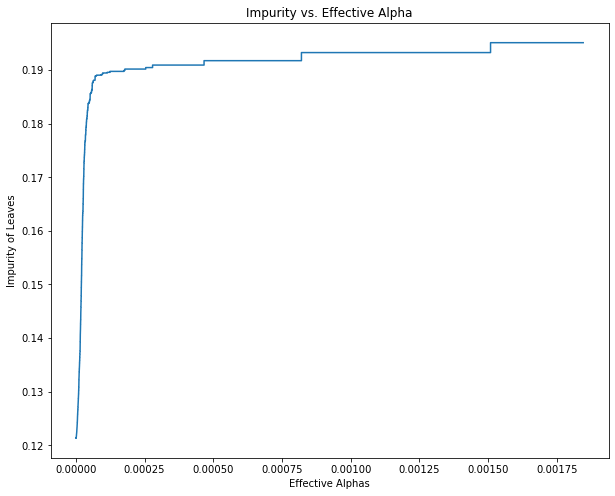

In [219]:
# Decision Tree Plot shown with nodes
fig, ax = plt.subplots(figsize=(10,8))
plt.step(ccp_alphas[:-1], impurities[:-1])
#plt.step(ccp_alphas[:-1], impurities[:-1],'--o', ax=ax[1])
plt.title('Impurity vs. Effective Alpha')
plt.xlabel('Effective Alphas')
plt.ylabel('Impurity of Leaves');

# Tree Display
The tree depth with max_depth=1 plot:
Out of the sample of 30891, the class of the target value resulted with "No" were 27021, & the value of "Yes" were 3487. These decision tree reveals that the overwhelming majority of customers are unable to repay their loans.


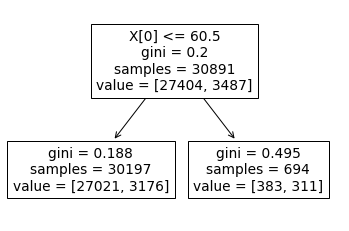

In [220]:
dtree = DecisionTreeClassifier(max_depth=1, random_state=42).fit(X_train, y_train)
dtree_plot = plot_tree(dtree)

# knn
K-Nearest Neighbors Model

In [222]:
# Using KNeighbors Classifier

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
knn_clf = KNeighborsClassifier()
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
knn_clf.fit(X_train_knn, y_train_knn)
predicted_KNN = knn_clf.predict(X_test_knn)

In [224]:
# Using KNeighbors Classifier with the Pipeline
# the accuracy of the split function & score of the fit 

knn_pipe = Pipeline([("knn", KNeighborsClassifier())])

knn_pipe.fit(X_train_knn, y_train_knn)
knn_score = knn_pipe.score(X_train_knn, y_train_knn)

accuracy_te_knn = knn_pipe.score(X_test_knn, y_test_knn)
accuracy_tr_knn = knn_pipe.score(X_train_knn, y_train_knn)
print(f"Test {accuracy_te_knn}")
print(f"Train {accuracy_tr_knn}")
print('KNN_score', knn_clf.score(X_test_knn,y_test_knn))

Test 0.9555061179087876
Train 0.9888641425389755
KNN_score 0.9555061179087876


# i.
KNN Confusion Matrix

When n_neighbors=6 at the highest value of 91, the confusion matrix showed the K-Nearest Neighbors (KNN) the maximum or the best score.

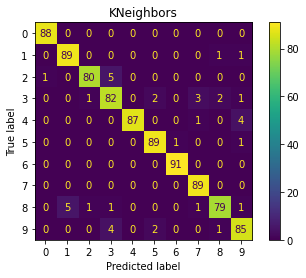

In [226]:
#visualizing results the KNN using Confusion Matrix
preds_knn = knn_pipe.predict(X_test_knn)

confusion_mat = confusion_matrix(y_test_knn, preds_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat)
disp.plot()
plt.title("KNeighbors")
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

# i. LR
Logistic Regression Confusion Matrix

When at the prediction level of 6 at the highest value of 90, the confusion matrix showed the Logistic Regression (LR) the maximum or the best score.

In [227]:
# Using Logistic Regression with split function
digits = datasets.load_digits()
n_samples = len(digits.images)
data_lr = digits.images.reshape((n_samples, -1))
clf_lr = LogisticRegression()
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
clf_lr.fit(X_train_lr, y_train_lr)
predicted_LR = clf_lr.predict(X_test_lr)

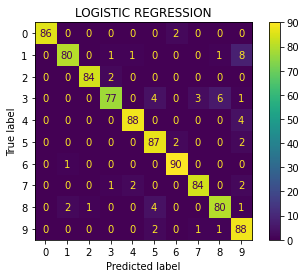

In [228]:
# Using Logistic Regression with the Pipeline
lr_pipe = Pipeline([('scale', StandardScaler()),('lr',LogisticRegression())]).fit(X_train_lr, y_train_lr)
lr_score = lr_pipe.score(X_train_lr, y_train_lr)

preds_lr = lr_pipe.predict(X_test_lr)

confusion_mat = confusion_matrix(y_test_lr, preds_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat)
disp.plot()
plt.title("LOGISTIC REGRESSION")
plt.show()

In [229]:
# the accuracy & score of the Logistic Regression of the split function
accuracy_te_LR = lr_pipe.score(X_test_lr, y_test_lr)
accuracy_tr_LR = lr_pipe.score(X_train_lr, y_train_lr)
print(f"Test {accuracy_te_LR}")
print(f"Train {accuracy_tr_LR}")
print('LR_score', clf_lr.score(X_test_lr,y_test_lr))


Test 0.9388209121245829
Train 1.0
LR_score 0.9299221357063404


# i. SVM
Support Vector Machine (SVM) Confusion Matrix

When the prediction level is 6,at the highest value of 47, the confusion matrix showed the Support Vector Machine (SVM)the maximum or the best score.

In [230]:
# Using Support Vector Machine with the split function
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
clf_svc = SVC()
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(data, digits.target, shuffle=False)
clf_svc.fit(X_train_svc, y_train_svc)
predicted_svc = clf_svc.predict(X_test_svc)
#np.sum(clf_svc.cv_results_['mean_fit_time'])

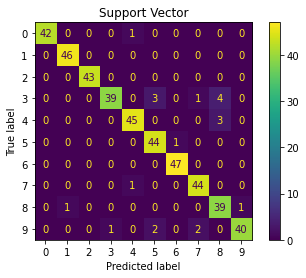

In [231]:
# Using Support Vector Machine with the pipeline
svc_pipe = Pipeline([('scale', StandardScaler()),('svc',SVC())]).fit(X_train_svc, y_train_svc)

preds_svc = svc_pipe.predict(X_test_svc)
svc_score = svc_pipe.score(X_train_svc, y_train_svc)

confusion_mat = confusion_matrix(y_test_svc, preds_svc)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat)
disp.plot()
plt.title("Support Vector")
plt.show()

In [232]:
# the accuracy & score of the Support Vector Machine (SVM) of the split function
accuracy_te_SVC = svc_pipe.score(X_test_svc, y_test_svc)
accuracy_tr_SVC = svc_pipe.score(X_train_svc, y_train_svc)
print(f"Test {accuracy_te_LR}")
print(f"Train {accuracy_tr_LR}")
print('SVC_score', clf_svc.score(X_test_svc,y_test_svc))


Test 0.9388209121245829
Train 1.0
SVC_score 0.9488888888888889


### Problem 9: Score the Model

What is the accuracy of your model?

# Score Display
the plot below shown: 

At a maximum depth of 4, the decision tree's best prediction has an accuracy of 89%; however, as depth increases, the number of nodes exhibited may become overfitted.

In [233]:
dtree_2 = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
max_depth = dtree_2.get_depth()

In [234]:
train_accu = []
test_accu = []
for d in range(1,max_depth+1,1):
    dtree_3 = DecisionTreeClassifier(random_state=42, max_depth=d).fit(X_train, y_train)
    train_accu.append(dtree_3.score(X_train, y_train))
    test_accu.append(dtree_3.score(X_test, y_test))

Text(0.5, 1.0, 'Depth vs. Score')

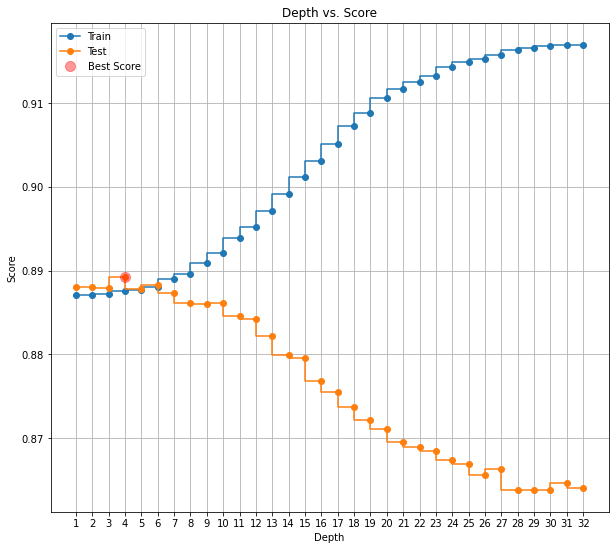

In [236]:
# the best score with overfit
plt.subplots(figsize = (10, 9))
plt.step(range(1,max_depth+1,1), train_accu, '-o', label = 'Train')
plt.step(range(1,max_depth+1,1), test_accu, '-o', label = 'Test')
plt.plot(np.argmax(test_accu)+1, max(test_accu), 'ro', markersize = 10, alpha = 0.4, label = 'Best Score')
plt.xticks(range(1,max_depth+1,1), rotation = 0)
plt.legend()
plt.grid()
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs. Score', fontsize=12)


# Classification Report of Decision Tree 
The classification report's Decision Tree model considers the number 10297 into consideration. The SVM model takes into consideration a sample size of 450, the Logistic Regression model takes into consideration an 899 sample, and the KNN model also accounts for an 899 sample. Therefore, for our score model we consider the classification of the decision tree since the sample is bigger.

In [278]:
#Decision Tree (DT) the report accuracy with the best score of sample size
print(classification_report(pred_dtree, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      9856
           1       0.08      0.22      0.12       441

    accuracy                           0.86     10297
   macro avg       0.52      0.56      0.52     10297
weighted avg       0.92      0.86      0.89     10297



In [275]:
#SVM
#print("Classification report:\n\n{}".format(classification_report(y_test_svc, predicted_svc)))


In [273]:
#LR
#print("Classification report:\n\n{}".format(classification_report(y_test_lr, predicted_LR)))

In [274]:
#KNN
#print("Classification report:\n\n{}".format(classification_report(y_test_knn, predicted_KNN)))
#print(classification_report(predicted_KNN, y_test_knn))

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

# Compare Model
the table shown the best Train accuracy with the SVM Model, on the other hand the best Test accuracy  with the KNN Model, i'm really struggling to find the best Train Time of my Models

In [242]:
result_df = pd.DataFrame({'Model': ['Logistic Regression','KNN', 'Decision Tree', 'SVM'],
                         'Train Time': [lr_score, knn_score, dtree_score, svc_score], 'Train Accuracy': [accuracy_tr_LR, accuracy_tr_knn,train_accu, accuracy_tr_SVC], 'Test Accuracy': [accuracy_te_LR, accuracy_te_knn, test_accu, accuracy_te_SVC]})
result_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,1.000000,1.0,0.938821
1,KNN,0.988864,0.988864,0.955506
2,Decision Tree,0.916966,"[0.887119225664433, 0.887119225664433, 0.88715...","[0.8880256385354958, 0.8880256385354958, 0.887..."
3,SVM,0.997773,0.997773,0.953333


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

# i.
# Gender Feature
The Gender feature in the dataset doesn't affect the exploration of the data, since the data score depends based on the other features such as job, loan & so on

# ii.
# Hyperparameter tune & explore
The model in which I used the recommended parameters had the shortest computation time, and it retrieved best test accuracy of 89%. I would choose this model of Decision Tree

In [243]:
# assume some random values to the parameters
params = {'max_depth': [2, 4, 6, 8, 9, 11],
          'min_samples_split': [0.1, 0.3, 0.005],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [2, 3, 4, 5]
         }


## a.

The Best Fit of Model for the feature of parameters for Grid Search.
The same model was used by all Four methods Classifiers:

## i.
For all execution results, their train and test accuracy scores were the same, but the model parameters were chosen separately by each search Grid Search method.


# 11.1
GRID SEARCH MODEL with Decision Tree

In [244]:
# the intiation of the data with intialize method & also comparing the GridSearch
#compare using different the GridSearch methods
## GridSearchCV
dtree4 = DecisionTreeClassifier(random_state=42)
Gr_dtree4 = GridSearchCV(dtree4, param_grid=params)
Gr_dtree4.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 9, 11],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [0.1, 0.3, 0.005]})

In [246]:
# the accuracy of the split function with best overfit
Gr_train_accu = Gr_dtree4.score(X_train, y_train)
Gr_test_accu = Gr_dtree4.score(X_test, y_test)
best_params = Gr_dtree4.best_params_

print(f'Train Accuracy: {Gr_train_accu: .5f}')
print(f'Test Accuracy: {Gr_test_accu: .5f}')
print(f'Best Params of Tree: {best_params}')

Train Accuracy:  0.88712
Test Accuracy:  0.88803
Best Params of Tree: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 0.1}


# Adjust your performance metric

In [247]:
# Report of the predict classification of the split function 
grid_predictions = Gr_dtree4.predict(X_test)
print(classification_report(grid_predictions, y_test))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94     10297
           1       0.00      0.00      0.00         0

    accuracy                           0.89     10297
   macro avg       0.50      0.44      0.47     10297
weighted avg       1.00      0.89      0.94     10297



# 11.2
Randomized Search Model 

In [248]:
# RandomizedSearchCV Method
R_grid = RandomizedSearchCV(dtree4, param_distributions=params).fit(X_train, y_train)
R_grid_train_accu = R_grid.score(X_train, y_train)
R_grid_test_accu = R_grid.score(X_test, y_test)
R_best_params = R_grid.best_params_

print(f'Train Accuracy: {R_grid_train_accu: .5f}')
print(f'Test Accuracy: {R_grid_test_accu: .5f}')
print(f'Best Params of Tree: {R_best_params}')

Train Accuracy:  0.88712
Test Accuracy:  0.88803
Best Params of Tree: {'min_samples_split': 0.1, 'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'gini'}


In [98]:
R_grid_predictions = R_grid.predict(X_test)
print(classification_report(R_grid_predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12357
           1       0.00      0.00      0.00         0

    accuracy                           0.89     12357
   macro avg       0.50      0.44      0.47     12357
weighted avg       1.00      0.89      0.94     12357



# 11.3
Halving Grid Search Model

In [250]:
# HalvingGridSearchCV Method 
H_grid = HalvingGridSearchCV(dtree4, param_grid=params).fit(X_train, y_train)
H_grid_train_accu = H_grid.score(X_train, y_train)
H_grid_test_accu = H_grid.score(X_test, y_test)
H_best_params = H_grid.best_params_

print(f'Train Accuracy: {H_grid_train_accu: .5f}')
print(f'Test Accuracy: {H_grid_test_accu: .5f}')
print(f'Best Params of Tree: {H_best_params}')

Train Accuracy:  0.88712
Test Accuracy:  0.88803
Best Params of Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 0.3}


In [251]:
H_grid_predictions = H_grid.predict(X_test)
print(classification_report(H_grid_predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     10297
           1       0.00      0.00      0.00         0

    accuracy                           0.89     10297
   macro avg       0.50      0.44      0.47     10297
weighted avg       1.00      0.89      0.94     10297



# 11.4
Halving Random Search Model

In [252]:
# HalvingRandomSearchCV Method
HR_grid = HalvingRandomSearchCV(dtree4, param_distributions=params).fit(X_train, y_train)
HR_grid_train_accu = HR_grid.score(X_train, y_train)
HR_grid_test_accu = HR_grid.score(X_test, y_test)
HR_best_params = HR_grid.best_params_

print(f'Train Accuracy: {HR_grid_train_accu: .5f}')
print(f'Test Accuracy: {HR_grid_test_accu: .5f}')
print(f'Best Params of Tree: {HR_best_params}')


Train Accuracy:  0.88712
Test Accuracy:  0.88803
Best Params of Tree: {'min_samples_split': 0.1, 'min_samples_leaf': 2, 'max_depth': 2, 'criterion': 'entropy'}


In [253]:
HR_grid_predictions = HR_grid.predict(X_test)
print(classification_report(HR_grid_predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     10297
           1       0.00      0.00      0.00         0

    accuracy                           0.89     10297
   macro avg       0.50      0.44      0.47     10297
weighted avg       1.00      0.89      0.94     10297



## ii. Lapsed Time
i used the 'mean_fit_time' ,
When I need to compare the times of all the plots, I computed the total elapsed time:

In [254]:
# The Lapse Time run the loop of the GridSearch Method
# Use the set of different metrics GridSearch Method all together!
grid_all=['GridSearchCV','RandomizedSearchCV','HalvingGridSearchCV','HalvingRandomSearchCV']
all_train_accu = [Gr_train_accu, R_grid_train_accu, H_grid_train_accu, HR_grid_train_accu]
all_test_accu  = [Gr_test_accu, R_grid_test_accu, H_grid_test_accu, HR_grid_test_accu]
elapsed_times = [np.sum(Gr_dtree4.cv_results_['mean_fit_time']), np.sum(R_grid.cv_results_['mean_fit_time']),
                 np.sum(H_grid.cv_results_['mean_fit_time']), np.sum(HR_grid.cv_results_['mean_fit_time'])]
depths = [best_params['max_depth'], R_best_params['max_depth'], H_best_params['max_depth'], HR_best_params['max_depth']]
splits = [best_params['min_samples_split'], R_best_params['min_samples_split'],
          H_best_params['min_samples_split'], HR_best_params['min_samples_split']]
leaves = [best_params['min_samples_leaf'], R_best_params['min_samples_leaf'],
          H_best_params['min_samples_leaf'], HR_best_params['min_samples_leaf']]


## iii. the plot below
according to all Grid Search methods for the best score, however the best score in terms of time! When compared to each model RandomizedSearchCV, HalvingRandomSearchCV, GridSearchCV and HalvingGridSearchCV.for all the data the best time score is HalvingRandomSearchCV that have much best time  score of the data.

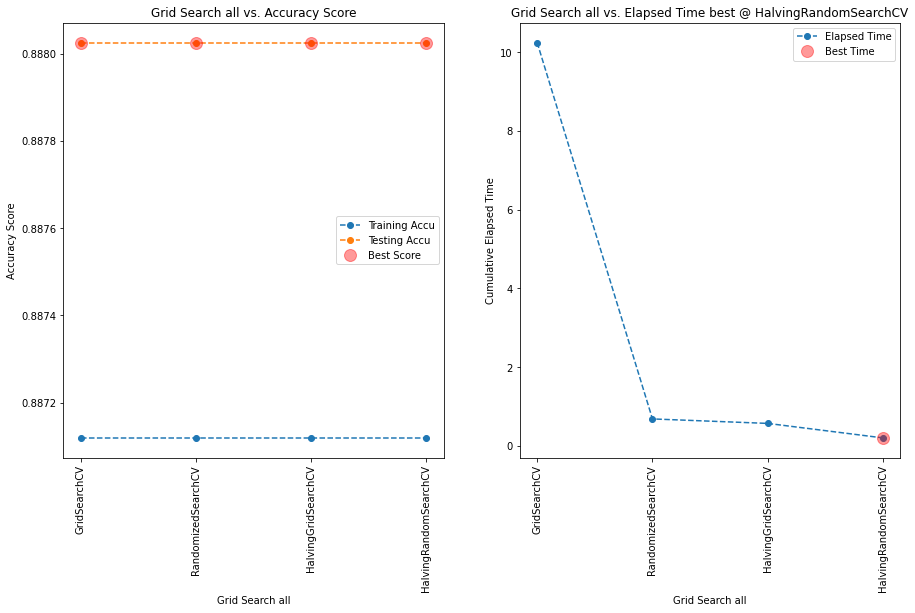

In [255]:
# plot accuracy and time elapsed
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
ax[0].plot(grid_all, all_train_accu, '--o', label = 'Training Accu')
ax[0].plot(grid_all, all_test_accu, '--o', label = 'Testing Accu')
ax[0].plot(grid_all, [max(all_test_accu)]*len(grid_all), 'ro', markersize = 12, alpha = 0.4, label = 'Best Score')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_xlabel('Grid Search all')
ax[0].set_ylabel('Accuracy Score')
ax[0].set_title('Grid Search all vs. Accuracy Score')
ax[0].legend()


# time plot
ax[1].plot(grid_all, elapsed_times, '--o', label = 'Elapsed Time')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_xlabel('Grid Search all')
ax[1].set_ylabel('Cumulative Elapsed Time')
ax[1].set_title(f'Grid Search all vs. Elapsed Time best @ {grid_all[np.argmin(elapsed_times)]}')
ax[1].plot(np.argmin(elapsed_times), min(elapsed_times), 'ro', markersize = 12, alpha = 0.4, label = 'Best Time')
ax[1].legend()


## iv. Dataframe
The Grid Search model's HalvingRandomSearchCV has the best performance, as evidenced by the lowest elapsed time, which indicates that the data flows faster, easier, and more smoothly. & also shown with max_depth =2

In [256]:
results_df = pd.DataFrame({'GridSearchCV':pd.Series(best_params),
                         'RandomizedSearchCV':pd.Series(R_best_params),
                         'HalvingGridSearchCV':pd.Series(H_best_params),
                         'HalvingRandomSearchCV':pd.Series(HR_best_params)
                        })
results_df.loc['train_accs', :] =  [Gr_train_accu,R_grid_train_accu,H_grid_train_accu, HR_grid_train_accu]
results_df.loc['test_accs', :] =  [Gr_test_accu, R_grid_test_accu,H_grid_test_accu, HR_grid_test_accu]
results_df.loc['elapsed_times', :] = [np.sum(Gr_dtree4.cv_results_['mean_fit_time']), np.sum(R_grid.cv_results_['mean_fit_time']),
                 np.sum(H_grid.cv_results_['mean_fit_time']), np.sum(HR_grid.cv_results_['mean_fit_time'])]
results_df


,GridSearchCV,RandomizedSearchCV,HalvingGridSearchCV,HalvingRandomSearchCV
criterion,gini,gini,gini,entropy
max_depth,2,6,6,2
min_samples_leaf,2,3,3,2
min_samples_split,0.1,0.1,0.3,0.1
train_accs,0.887119,0.887119,0.887119,0.887119
test_accs,0.888026,0.888026,0.888026,0.888026
elapsed_times,10.250112,0.6834,0.569487,0.200933


## iv.a
shown the plot below is the Decision Tree with max_depth=1, for each Grid Search method of classifiers

Text(0.5, 1.0, 'RandomizedSearch')

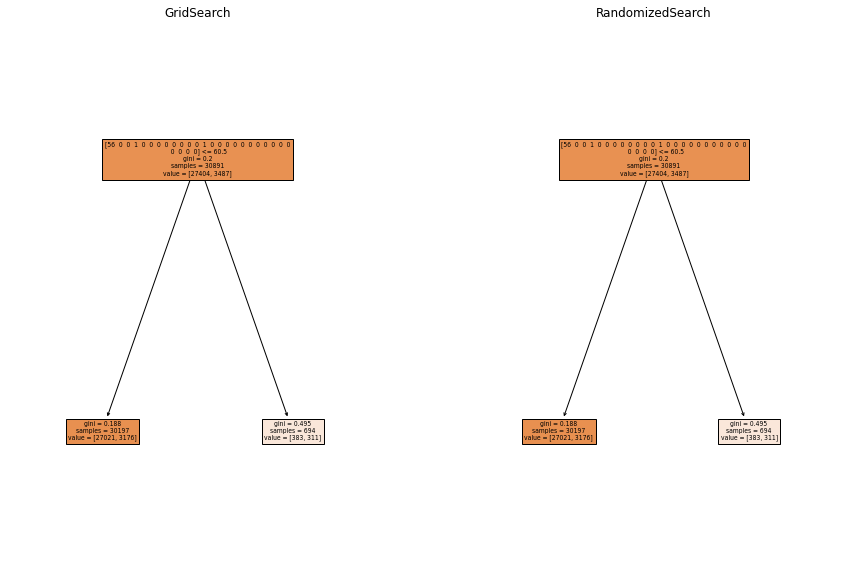

In [262]:
fig, ax = plt.subplots(1,2, figsize = (15, 10))
plot_tree(DecisionTreeClassifier(max_depth = 1, random_state=42).fit(X_train, y_train), ax = ax[0], filled = True, feature_names=X);
ax[0].set_title('GridSearch', fontsize = 12)
plot_tree(DecisionTreeClassifier(max_depth = 1, random_state = 42).fit(X_train, y_train), filled = True, feature_names = X);
ax[1].set_title('RandomizedSearch', fontsize = 12)

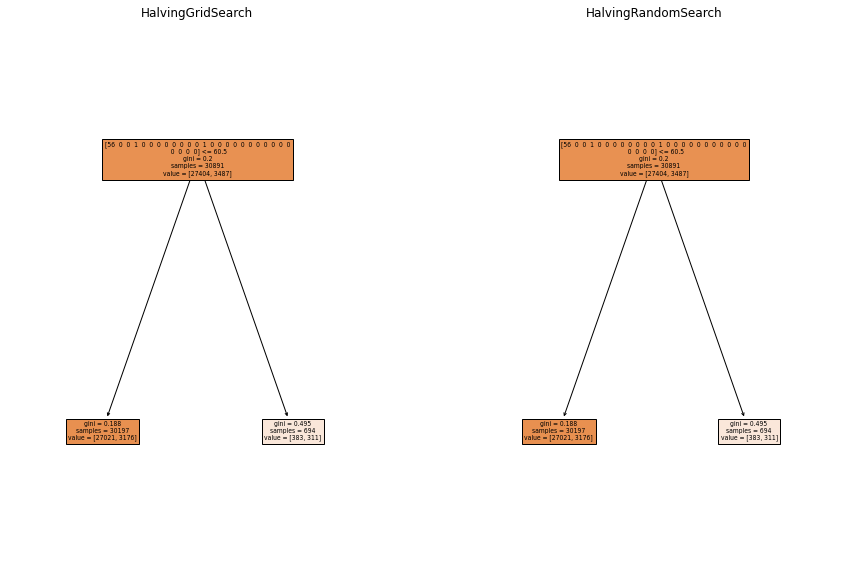

In [261]:
fig, ax = plt.subplots(1,2, figsize = (15, 10))
plot_tree(DecisionTreeClassifier(max_depth = 1, random_state = 22).fit(X_train, y_train), ax = ax[0], filled = True, feature_names = X);
ax[0].set_title('HalvingGridSearch', fontsize = 12)

plot_tree(DecisionTreeClassifier(max_depth = 1, random_state = 22).fit(X_train, y_train), filled = True, feature_names = X);
ax[1].set_title('HalvingRandomSearch', fontsize = 12);

##### Questions